<a href="https://colab.research.google.com/github/tharun067/python_problems/blob/main/AD(NLP)3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sent ="Ram is studying at Malla Reddy university in Hyderabad,India"


In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.7 MB/s eta 0:00:00


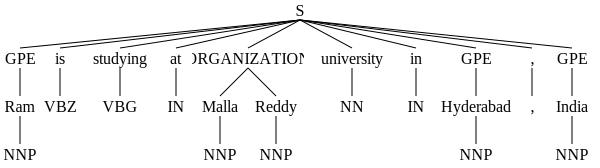

In [ ]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize
ne_chunk(nltk.pos_tag(word_tokenize(sent)),binary=False)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc= nlp('Apple iss ready to launch new phone worth $1000 in new york time square')
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
1000 43 47 MONEY
new york 51 59 GPE


In [ ]:
text ="""
Elon Musk,the CEO of spaceX and Tesla, announced that spaceX's Starship will launching its first crewed mission to Mars in 2027.
The mission, which will involve astronauts from NASA,will be the first of its kind, and it will take place at the Kennedy Space Center in Florida.
Musk emphasized that the project would push the bou daries of space exploration.
"""

In [ ]:
doc = nlp(text)
for ent in doc.ents:
  print(f"Entity:{ent.text},Label:{ent.label_}")

Entity:Elon Musk,Label:PERSON
Entity:spaceX,Label:PERSON
Entity:Tesla,Label:ORG
Entity:first,Label:ORDINAL
Entity:Mars,Label:LOC
Entity:2027,Label:DATE
Entity:NASA,Label:ORG
Entity:first,Label:ORDINAL
Entity:the Kennedy Space Center,Label:FAC
Entity:Florida,Label:GPE


In [ ]:
import pandas as pd
entities = [(ent.text,ent.label_,ent.lemma_) for ent in doc.ents]
df = pd.DataFrame(entities,columns=['text','type','lemma'])
print(df)

                       text     type                     lemma
0                 Elon Musk   PERSON                 Elon Musk
1                    spaceX   PERSON                    spaceX
2                     Tesla      ORG                     Tesla
3                     first  ORDINAL                     first
4                      Mars      LOC                      Mars
5                      2027     DATE                      2027
6                      NASA      ORG                      NASA
7                     first  ORDINAL                     first
8  the Kennedy Space Center      FAC  the Kennedy Space Center
9                   Florida      GPE                   Florida


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Reviews.csv',nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [5]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [7]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [9]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import WordList
df['Text'] = df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')

stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

df['text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


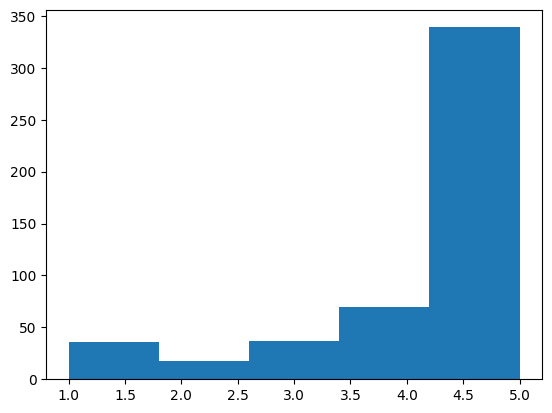

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [10]:
reviews = df

reviews.dropna(inplace=True)

reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [11]:
score_1 = reviews[reviews['Score']==1].sample(n=18)
score_2 = reviews[reviews['Score']==2].sample(n=18)
score_3 = reviews[reviews['Score']==3].sample(n=18)
score_4 = reviews[reviews['Score']==4].sample(n=18)
score_5 = reviews[reviews['Score']==5].sample(n=18)

In [14]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


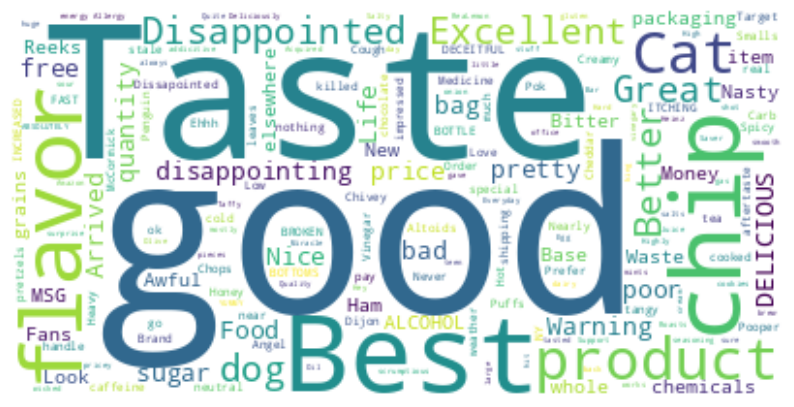

In [15]:
from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample['Summary'].to_numpy())
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()